In [3]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting library
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import Imputer #for handling missing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing the dataset
dataset = pd.read_csv('train.csv')

#Show first 5 rows
dataset.head()

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
0,0.0,24.0,0.0,0.0,5.0,247.30,2.0,0.0,4.0,17.0,...,1.0,591.3,0.0,0.0,0.0,0.0,782.40,4.0,1458.0,0.8571
1,1.0,440875.0,1.0,1.0,0.0,37.65,1.0,1.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,119.60,3.0,1511.0,0.0400
2,2.0,878242.0,2.0,0.0,1.0,93.73,1.0,0.0,2.0,54.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3248.00,5.0,1583.0,0.7407
3,3.0,1319841.0,3.0,0.0,0.0,95.88,0.0,0.0,0.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.49,1.0,1489.0,0.1146
4,4.0,1757883.0,4.0,0.0,1.0,0.00,0.0,0.0,1.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,640.80,4.0,1475.0,0.5217


In [4]:
dataset_test=pd.read_csv('test.csv')

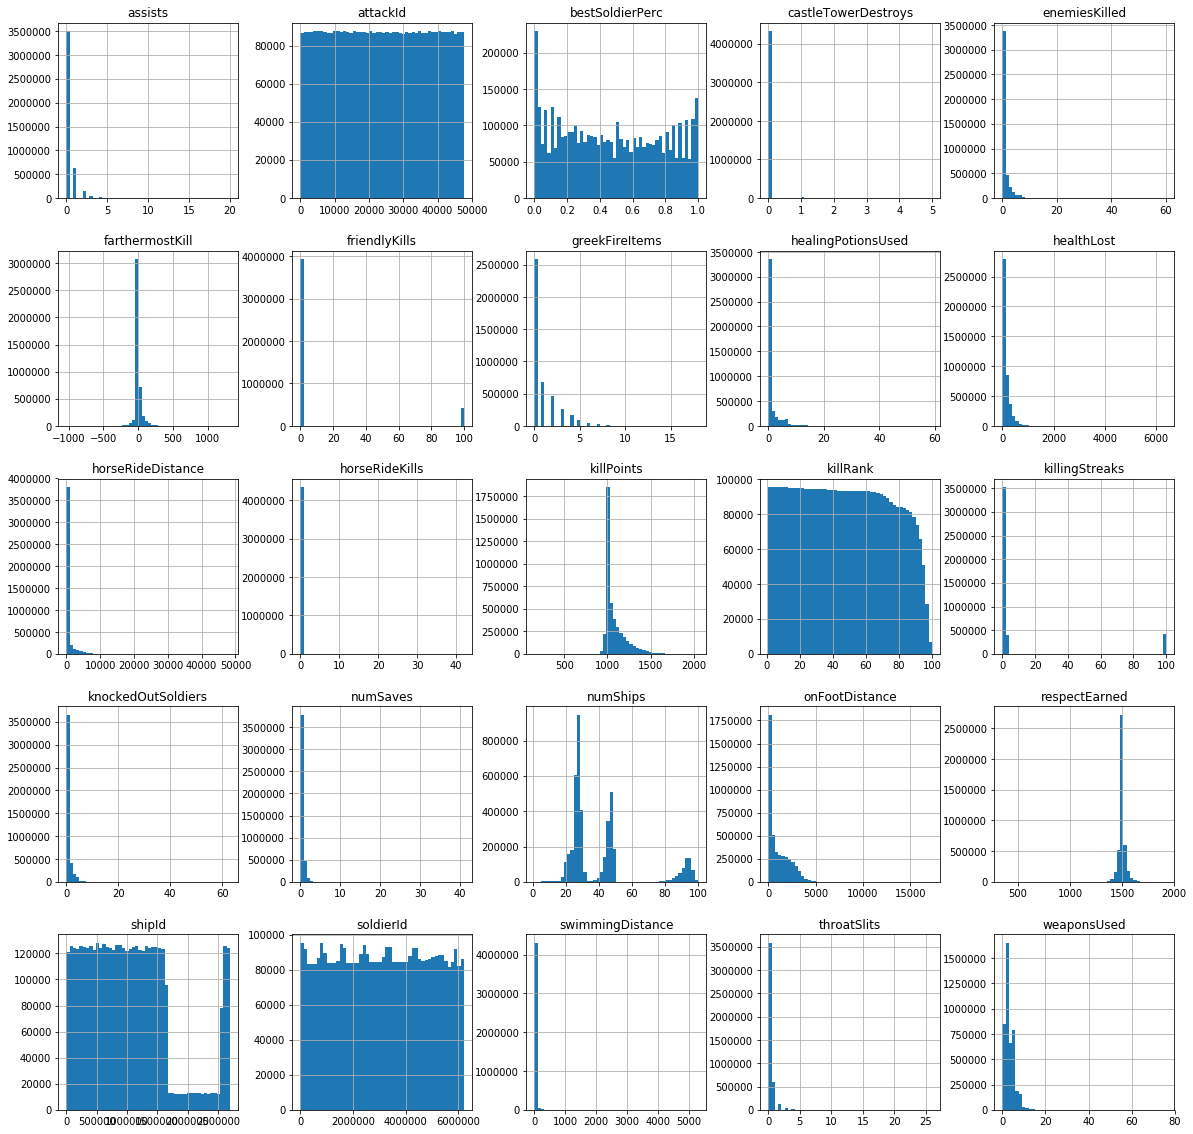

In [5]:
#setup  Matplotlib (magic function) . Plots will render within the notebook itself
%matplotlib inline  
dataset.hist(bins = 50 , figsize = (20,20))
plt.show()


In [6]:
dataset.isnull().sum()

soldierId              0
shipId                 0
attackId               0
assists                0
greekFireItems         0
healthLost             0
knockedOutSoldiers     0
throatSlits            0
healingPotionsUsed     0
killRank               0
killPoints             0
enemiesKilled          0
killingStreaks         0
farthermostKill        0
numShips               0
numSaves               0
horseRideDistance      0
horseRideKills         0
swimmingDistance       0
friendlyKills          0
castleTowerDestroys    0
onFootDistance         0
weaponsUsed            0
respectEarned          0
bestSoldierPerc        0
dtype: int64

In [7]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1] #Dependant Varible
X.head() #show first 5 records

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numShips,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned
0,0.0,24.0,0.0,0.0,5.0,247.30,2.0,0.0,4.0,17.0,...,28.0,1.0,591.3,0.0,0.0,0.0,0.0,782.40,4.0,1458.0
1,1.0,440875.0,1.0,1.0,0.0,37.65,1.0,1.0,0.0,45.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,119.60,3.0,1511.0
2,2.0,878242.0,2.0,0.0,1.0,93.73,1.0,0.0,2.0,54.0,...,28.0,1.0,0.0,0.0,0.0,0.0,0.0,3248.00,5.0,1583.0
3,3.0,1319841.0,3.0,0.0,0.0,95.88,0.0,0.0,0.0,86.0,...,94.0,0.0,0.0,0.0,0.0,0.0,0.0,21.49,1.0,1489.0
4,4.0,1757883.0,4.0,0.0,1.0,0.00,0.0,0.0,1.0,58.0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,640.80,4.0,1475.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)


Mutiple Linear Regression Accuracy:  0.7852459616523493
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.78521263220771


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))

# #Predicting the SalePrice using cross validation (KFold method)
# y_pred_rf = cross_val_predict(rf_regressor, X, y, cv=10 )

# #Random Forest Regression Accuracy with cross validation
# accuracy_rf = metrics.r2_score(y, y_pred_rf)
# print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_rf)